# Quantum Computing Tasks
## Task 1: To perform basic quantum operations on qubits

Importing Cirq and pi.

In [1]:
import cirq
from math import pi

Defining the number of qubits to be used and creating the circuit.

In [2]:
n_qubits = 5
circuit = cirq.Circuit()

# Creating those qubits
qubits = [cirq.LineQubit(i) for i in range(n_qubits)]

Applying Hadamard Gate to all qubits with ParallelGateOperations function which allows application of a gate to multiple qubits in a single Moment.

In [3]:
H = cirq.ParallelGateOperation(cirq.H, qubits)
# Adding this operation to the circuit as a moment
circuit.append([H])

Applying CNOT Gate sequentially to the qubits.

In [4]:
for i in range(n_qubits - 1):
    circuit.append([cirq.CNOT(qubits[i], qubits[i + 1])], cirq.InsertStrategy.NEW)

Swapping the 0 and 4 qubits.

In [5]:
SWAP = cirq.SWAP(qubits[0], qubits[4])
circuit.append([SWAP])

Rotating X by pi/2 radians

In [6]:
phase_shift = cirq.rx(pi/2)
ROTATE = cirq.ParallelGateOperation(phase_shift, qubits)
circuit.append([ROTATE])

Printing the obtained circuit now.

In [7]:
print(circuit)

0: ───H───@───────────────×───Rx(0.5π)───
          │               │
1: ───H───X───@───────────┼───Rx(0.5π)───
              │           │
2: ───H───────X───@───────┼───Rx(0.5π)───
                  │       │
3: ───H───────────X───@───┼───Rx(0.5π)───
                      │   │
4: ───H───────────────X───×───Rx(0.5π)───


## Task 2: To plot a graph between rotating the x axis of a qubit and the subsequent probabilities obtained of getting its state as |0>

Importing pyplot for generating graphs and creating a new circuit.

In [8]:
import matplotlib.pyplot as plt

qubit = cirq.LineQubit(0)
circuit = cirq.Circuit()

Scale by which the x axis is to be rotated, e.g if the scale is 0.2 then after each moment the axis will be rotated by 0.2*pi radians.

In [9]:
rotation_scale = 0.25
n_phase_shift_ops = int(2 / rotation_scale)

For plotting the graph for every phase shift, initiating with no shift.

In [10]:
phase_shifts = ["0pi"]

To get initial probability of the qubit being in |0> state. Always 1 since qubits in this case initiate with |0> state unless an initial state is passed to the simulator.

In [11]:
circuit.append([cirq.I(qubit)])

Getting results for a complete bloch spher rotation

In [12]:
for i in range(n_phase_shift_ops):
    phi_shift_gate = cirq.rx(pi * rotation_scale)
    circuit.append([phi_shift_gate(qubit)])

    phase_shifts.append(str((i + 1) * rotation_scale) + "pi")

# Shows the circuit
print(circuit)

0: ───I───Rx(0.25π)───Rx(0.25π)───Rx(0.25π)───Rx(0.25π)───Rx(0.25π)───Rx(0.25π)───Rx(0.25π)───Rx(0.25π)───


Step wise simulation to get density matrix after each moment.

In [13]:
sim = cirq.DensityMatrixSimulator()
stepwise_res = sim.simulate_moment_steps(circuit)

Probabilities of measuring the state in |0> state after every phase shift.

In [14]:
probs = []

for res in stepwise_res:
    # Getting the |0> state probability
    probs.append(res.density_matrix().real[0][0])

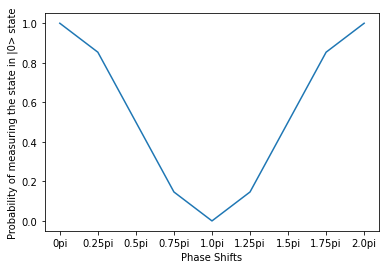

In [15]:
# Plotting the graph
%matplotlib inline

plt.plot(phase_shifts, probs)
plt.xlabel("Phase Shifts")
plt.ylabel("Probability of measuring the state in |0> state")
plt.show()